## Observations and Insights 

In [92]:
#As the weight of the mice increases the average tumor volume increases too.

#The amounts of male and female mice are pretty equal, only differing within a percent.

#The drug regimen that was tested on the most mice was Capomulin.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pymaceuticals_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_pymaceuticals_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [93]:
# Check the number of mice.
mouse_count = combined_pymaceuticals_df["Mouse ID"].nunique()
mouse_count



249

In [94]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
all_duplicate_pymaceuticals_df = combined_pymaceuticals_df[combined_pymaceuticals_df.duplicated(['Mouse ID', 'Timepoint'])]
all_duplicate_pymaceuticals_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Drop any duplicate rows
no_duplicate_pymaceuticals_df = combined_pymaceuticals_df.drop_duplicates("Mouse ID")
no_duplicate_pymaceuticals_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [96]:
# Recheck the number of mice
new_mouse_count = no_duplicate_pymaceuticals_df["Mouse ID"].nunique()
new_mouse_count



249

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_group = combined_pymaceuticals_df.groupby('Drug Regimen')
mean = regimen_group['Tumor Volume (mm3)'].mean()
median = regimen_group['Tumor Volume (mm3)'].median()
variance = regimen_group['Tumor Volume (mm3)'].var()
standard_deviation = regimen_group['Tumor Volume (mm3)'].std()
sem = regimen_group['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance,'Tumor Volume Std. Dev.': standard_deviation, 'Tumor Volume Std. Err.': sem})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

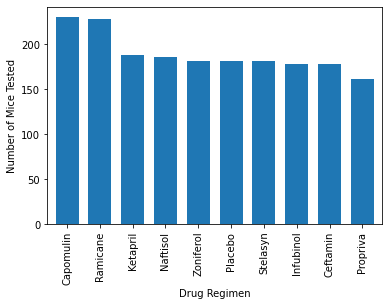

In [98]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
bar_plot = combined_pymaceuticals_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")



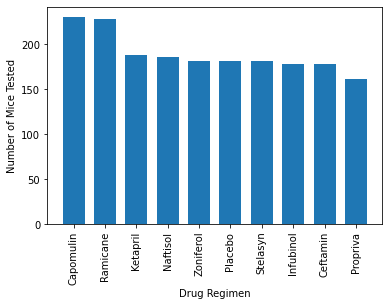

In [99]:
# Generate identical bar plot using pyplot instead of pandas.
import numpy as np
count = combined_pymaceuticals_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(count))
plt.bar(x_axis, count, width = 0.7, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



Text(0, 0.5, 'Sex')

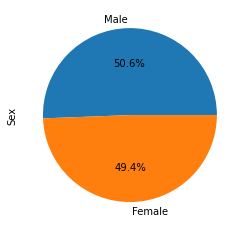

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count = combined_pymaceuticals_df['Sex'].value_counts()
pie_plot = count.plot.pie(autopct="%1.1f%%")
pie_plot.set_ylabel("Sex")



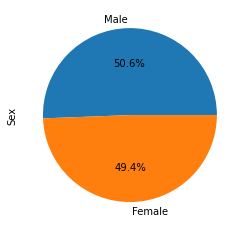

In [101]:
# Generate identical pie plot using pyplot
count = combined_pymaceuticals_df['Sex'].value_counts()
plt.pie(count, labels=count.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = pd.DataFrame(combined_pymaceuticals_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})
timepoint_df
last_volume_df = pd.merge(combined_pymaceuticals_df, timepoint_df, on='Mouse ID')
last_volume_df.head()
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
new_volume = []
for drug in drugs:    
    volume_df = last_volume_df.loc[last_volume_df['Drug Regimen'] == drug]
    new_volume_df = volume_df.loc[volume_df['Timepoint'] == volume_df['Last Timepoint']]
    volume = new_volume_df['Tumor Volume (mm3)']
    new_volume.append(drugs)


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [102]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles = drugs.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print((f"The interquartile range of drugs is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print((f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers_count = (drugs.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                    (last_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
print(f'Number of {drug} outliers: {outliers_count}')
    

In [103]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(new_volume, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

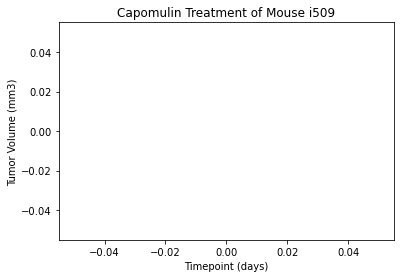

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
point = combined_pymaceuticals_df.loc[combined_pymaceuticals_df['Mouse ID'] == 'i509']
plt.plot(point['Timepoint'], point['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse i509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


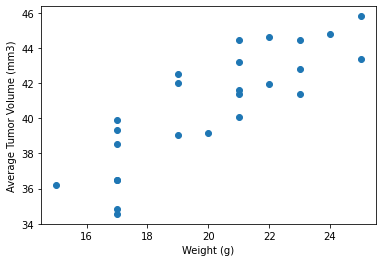

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_df = combined_pymaceuticals_df.loc[combined_pymaceuticals_df['Drug Regimen'] == 'Capomulin']
volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
volume_df = pd.merge(capomulin_df, volume_df, on='Mouse ID')
new_volume_df = volume_df[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
new_volume_df
x = new_volume_df['Weight (g)']
y = new_volume_df['Average Tumor Volume (mm3)']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84.


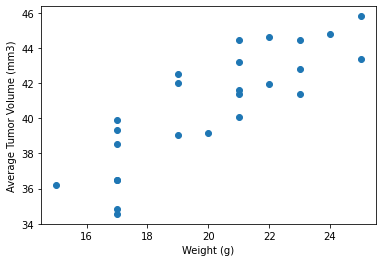

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = combined_pymaceuticals_df.loc[combined_pymaceuticals_df['Drug Regimen'] == 'Capomulin']
volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
volume_df = pd.merge(capomulin_df, volume_df, on='Mouse ID')
new_volume_df = new_volume_df[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
new_volume_df
x = new_volume_df['Weight (g)']
y = new_volume_df['Average Tumor Volume (mm3)']
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}.""")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


# Observations and Insights